# Trabajo de simulación 3

Para el último trabajo de simulación, vamos a hacer un análisis de datos a partir de la encuesta de salarios de Sysarmy del primer trimestre de 2024 (si están publicados los del segundo trimestre o posterior, podemos usar esos).

Los datos oficiales se encuentran [acá](https://docs.google.com/spreadsheets/d/1M1SUlDPDZtM1-pGd4GJOTTY7GqHzaEOGbu1DSpVFBeo/edit?gid=1520628801#gid=1520628801). Por si en algún momento el enlace se cae o cambia de ubicación, una versión descargada el 10 de julio de 2024 puede encontrarse [acá](https://docs.google.com/spreadsheets/d/1v1aMvnR6JNfQoBrqfnuw1xMPU4mrzr9e/edit?usp=sharing&ouid=104217074840737622126&rtpof=true&sd=true).

Las consignas de este trabajo no son tan dirigidas como las de los trabajos anteriores, pues en el análisis de datos, siempre hay libertad y margen para la creatividad y la producción personal. Sin embargo, les compartimos algunas pautas de lo que debe tener, como mínimo, este trabajo.

Pautas generales y **OBLIGATORIAS** para la aprobación de la entrega:

*   Debe replicarse, como mínimo, un análisis similar al aquí presentado para los datos del 2020.
*   Debe escribirse en formato "informe", es decir, no se trata de exhibir código y gráficos, sino de explicar qué se observa y por qué es relevante observar eso. El informe es requisito **excluyente**. No se aprueba el trabajo de simulación sin él. Este informe breve debe entregarse en un word/pdf, en esta entrega **NO** se evalúa el colab, sino el reporte.
*   El trabajo debe contener, como mínimo, **una conjetura que sea sometida a prueba y de la que se exhiba alguna conclusión fundamentada**, como se hizo en el caso de los datos de 2020 para el salario medio bruto por género y para hombres y mujeres con nivel universitario completo. Por ejemplo, frente a la pregunta de si el salario medio de mujeres y hombres es igual, podríamos poner en práctica lo que estudiamos sobre convergencia para, de alguna forma, darnos una idea de cuán probable es observar lo que efectivamente estamos observando. Este es un "coqueteo" con la estadística inferencial, que no estudiamos formalmente en la materia, pero que es válido comenzar a encarar con todo lo que hemos estudiado.

El resto de la producción queda a criterio de los grupos. Esperamos que haya un interés genuino en tratar de extraer información a partir de estos datos. ¡Muchos éxitos!

**PD: El formato "informe" puede ser cambiado por el formato "póster" si es que así prefieren.**

In [ ]:
# Librerías
import io
import pandas as pd

pd.set_option('display.max_rows', 10)

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


In [12]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['2024.1 - Sysarmy - Encuesta de remuneración salarial Argentina - Sysarmy 2024.01_CLEAN.csv']))
# Con esta instrucción imprimimos las primeras 10 filas del dataset
df[0:9]

In [13]:
df = pd.read_csv('/content/Trabajo_Practico3/2024.1 - Sysarmy - Encuesta de remuneración salarial Argentina - Sysarmy 2024.01_CLEAN.csv')
# Con esta instrucción imprimimos las primeras 10 filas del dataset
df[0:9]

,Unnamed: 0,donde_estas_trabajando,dedicacion,tipo_de_contrato,ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos,ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos,pagos_en_dolares,si_tu_sueldo_esta_dolarizado_cual_fue_el_ultimo_valor_del_dolar_que_tomaron,recibis_algun_tipo_de_bono,a_que_esta_atado_el_bono,...,salir_o_seguir_contestando_sobre_las_guardias,tenes_guardias,cuanto_cobras_por_guardia,aclara_el_numero_que_ingresaste_en_el_campo_anterior,salir_o_seguir_contestando_sobre_estudios,tengo_edad,genero,sueldo_dolarizado,seniority,_sal
0,0,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),1700000.0,1500000.0,Cobro parte del salario en dólares,1000,No,No recibo bono,...,Terminar encuesta,NaN,NaN,NaN,NaN,31,Hombre Cis,True,Semi-Senior,1700000.0
1,1,Buenos Aires,Full-Time,Staff (planta permanente),2000000.0,1900000.0,Cobro parte del salario en dólares,NaN,Menos de un sueldo,Performance individual,...,Responder sobre guardias,"Sí, pasiva",0.0,Porcentaje de mi sueldo bruto,Terminar encuesta,28,Hombre Cis,True,Semi-Senior,2000000.0
2,2,Córdoba,Full-Time,Contractor,1000000.0,1000000.0,Cobro todo el salario en dólares,1500,No,No recibo bono,...,Responder sobre guardias,No,0.0,Neto,Terminar encuesta,27,Hombre Cis,True,Semi-Senior,1000000.0
3,3,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),850000.0,2700000.0,Cobro parte del salario en dólares,1010,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,31,Hombre Cis,True,Senior,850000.0
4,4,Ciudad Autónoma de Buenos Aires,Full-Time,Contractor,3300000.0,3000000.0,Cobro todo el salario en dólares,1000,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,34,Hombre Cis,True,Semi-Senior,3300000.0
5,5,Córdoba,Full-Time,Contractor,450000.0,450000.0,Mi sueldo está dolarizado (pero cobro en moned...,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,32,Hombre Cis,True,Junior,450000.0
6,6,Córdoba,Full-Time,Staff (planta permanente),835469.0,693439.0,Cobro parte del salario en dólares,1014,Un sueldo,Performance de la compañía,...,Terminar encuesta,No,0.0,Porcentaje de mi sueldo bruto,Responder sobre mis estudios,29,Hombre Cis,True,Senior,835469.0
7,7,Buenos Aires,Full-Time,Contractor,1050000.0,1050000.0,Cobro parte del salario en dólares,NaN,No,No recibo bono,...,Terminar encuesta,NaN,NaN,NaN,NaN,28,Hombre Cis,True,Semi-Senior,1050000.0
8,8,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),860000.0,805000.0,Cobro parte del salario en dólares,1040,Un sueldo,Performance individual,...,NaN,NaN,NaN,NaN,NaN,32,Hombre Cis,True,Semi-Senior,860000.0


* Rubro: Unnamed: 17
* Salario Bruto: Unnamed: 4
* Provincia: Unnamed: 1

In [14]:
# Limpieza y tratamiento del dataset e impresión de los resultados

# 1. Sacar las filas con datos faltantes:
df_cleaned = df.dropna(subset=['donde_estas_trabajando', 'ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'])

# 2. Pasar el sueldo a números:
def convert_to_numeric(value):
    try:
        return float(value)
    except (ValueError, TypeError):
        return None

df_cleaned['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'] = df_cleaned['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'].apply(convert_to_numeric)

# 3. Sacar las filas con sueldos nulos:
df_cleaned = df_cleaned.dropna(subset=['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'])

# --- Manejo de valores atípicos (outliers) y celdas vacías ---

# 1. Eliminar valores atípicos usando IQR:
Q1 = df_cleaned['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'].quantile(0.25)  # Cuartil 25 (Q1)
Q3 = df_cleaned['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'].quantile(0.75)  # Cuartil 75 (Q3)
IQR = Q3 - Q1  # Rango intercuartil
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
filtered_df = df_cleaned[(df_cleaned['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'] >= limite_inferior) &
                         (df_cleaned['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'] <= limite_superior)]

# # 2. Usar media recortada (descomentar si se prefiere este método)
# salario_por_provincia = df.groupby('donde_estas_trabajando')['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'].apply(lambda x: stats.trim_mean(x, 0.1)).sort_values(ascending=False)

# 3. Manejar celdas vacías (si se usa el método IQR, usar filtered_df)
df_cleaned = filtered_df.dropna(subset=['donde_estas_trabajando', 'ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'])
salario_por_provincia = df_cleaned.groupby('donde_estas_trabajando')['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'].mean().sort_values(ascending=False)


# 4. Encontrar la provincia con el mejor y peor salario promedio:
best_province = salario_por_provincia.idxmax()
worst_province = salario_por_provincia.idxmin()

# 5. Función para formatear números grandes con separadores de miles:
def formatear_numero(numero):
    return "{:,.0f}".format(numero).replace(",", "X").replace(".", ",").replace("X", ".")

# 6. Imprimir los resultados formateados:
print(f"Provincia con mejor salario promedio: {best_province} ({formatear_numero(salario_por_provincia[best_province])} ARS)")
print(f"Provincia con peor salario promedio: {worst_province} ({formatear_numero(salario_por_provincia[worst_province])} ARS)")

# Tabla de datos del salario por provincia formateados:
print(salario_por_provincia.sort_values(ascending=False).apply(formatear_numero))

Provincia con mejor salario promedio: Neuquén (2.265.678 ARS)
Provincia con peor salario promedio: San Juan (1.194.257 ARS)
donde_estas_trabajando
Neuquén                            2.265.678
Tierra del Fuego                   2.222.180
Chubut                             2.070.693
Ciudad Autónoma de Buenos Aires    2.017.487
Río Negro                          1.985.843
                                     ...    
Chaco                              1.439.714
Tucumán                            1.409.545
Santiago del Estero                1.407.023
Santa Cruz                         1.365.444
San Juan                           1.194.257
Name: ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos, Length: 24, dtype: object


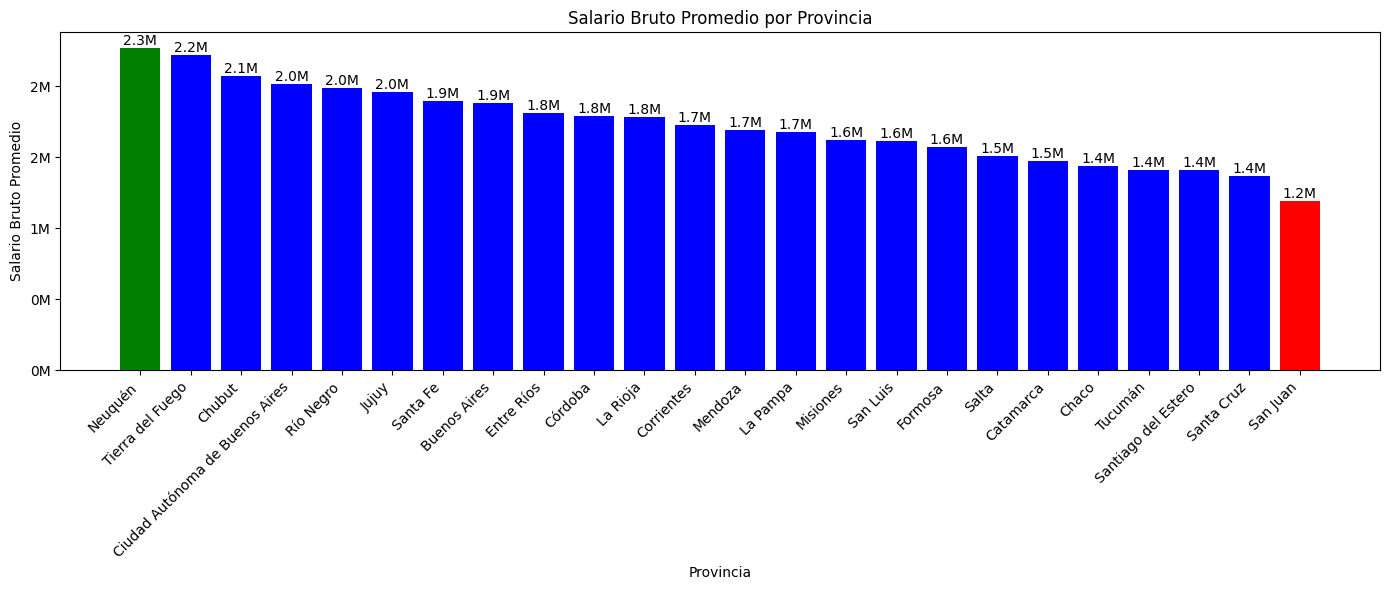

In [16]:
# Graficar los resultados con un gráfico de barras verticales (clásico)

# Crear el gráfico de barras
plt.figure(figsize=(14, 6))
colors = ['blue'] * len(salario_por_provincia)
colors[salario_por_provincia.index.get_loc(best_province)] = 'green'
colors[salario_por_provincia.index.get_loc(worst_province)] = 'red'
bars = plt.bar(salario_por_provincia.index, salario_por_provincia.values, color=colors)
plt.title('Salario Bruto Promedio por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Salario Bruto Promedio')
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas de datos en las barras (en millones)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval / 1000000:.1f}M', va='bottom', ha='center')  # Mostrar en millones con un decimal

# Formato del eje Y en millones
plt.ticklabel_format(style='plain', axis='y')
formatter = plt.FuncFormatter(lambda x, pos: f'{x / 1000000:.0f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

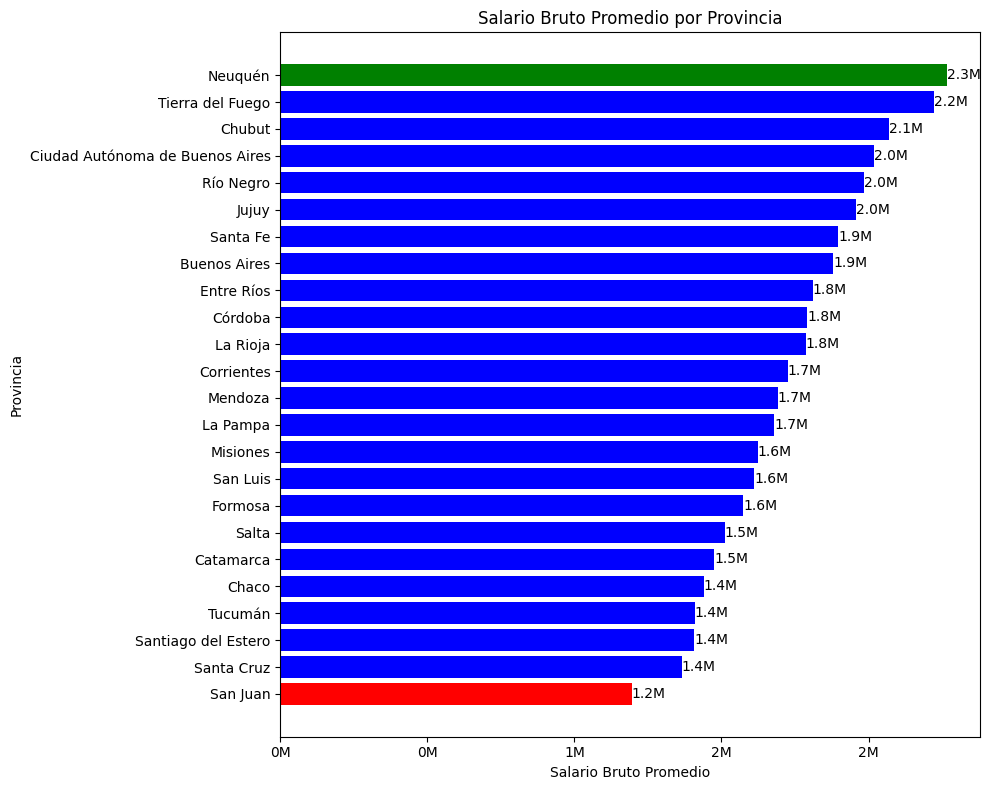

In [17]:
# Graficar los resultados con un gráfico de barras horizontales (opción 2)

# Invertir el orden de los datos
salario_por_provincia = salario_por_provincia[::-1]
colors = colors[::-1]

# Graficar los resultados con un gráfico de barras horizontales
plt.figure(figsize=(10, 8))  # Ajustar tamaño para barras horizontales

# Crear el gráfico de barras horizontales
bars = plt.barh(salario_por_provincia.index, salario_por_provincia.values, color=colors)  # Usar barh en lugar de bar
plt.title('Salario Bruto Promedio por Provincia')
plt.xlabel('Salario Bruto Promedio')  # Invertir etiquetas de ejes
plt.ylabel('Provincia')

# Agregar etiquetas de datos en las barras (en millones)
for bar in bars:
    xval = bar.get_width()  # Obtener el ancho de la barra (valor x)
    plt.text(xval, bar.get_y() + bar.get_height()/2, f'{xval / 1000000:.1f}M', va='center', ha='left')  # Ajustar posición y alineación

# Formato del eje X en millones
plt.ticklabel_format(style='plain', axis='x')
formatter = plt.FuncFormatter(lambda x, pos: f'{x / 1000000:.0f}M')
plt.gca().xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

##########

27-11-2024

\>

In [22]:
REGION_NOA = ["Jujuy", "Salta", "Tucumán", "Santiago del Estero", "Catamarca", "La Rioja"]

REGION_NEA = ["Misiones", "Corrientes", "Chaco", "Formosa"]

REGION_CENTRO = ["Córdoba", "Santa Fe", "Entre Ríos", "Buenos Aires", "Ciudad Autónoma de Buenos Aires", "Mendoza", "San Juan", "San Luis"]

REGION_PATAGONICA = ["La Pampa", "Río Negro", "Neuquén", "Chubut", "Santa Cruz", "Tierra del Fuego"]

df_noa = df[df['donde_estas_trabajando'].isin(REGION_NOA)]
df_nea = df[df['donde_estas_trabajando'].isin(REGION_NEA)]
df_centro = df[df['donde_estas_trabajando'].isin(REGION_CENTRO)]
df_patagonica = df[df['donde_estas_trabajando'].isin(REGION_PATAGONICA)]

# Noroeste argentino (NOA):

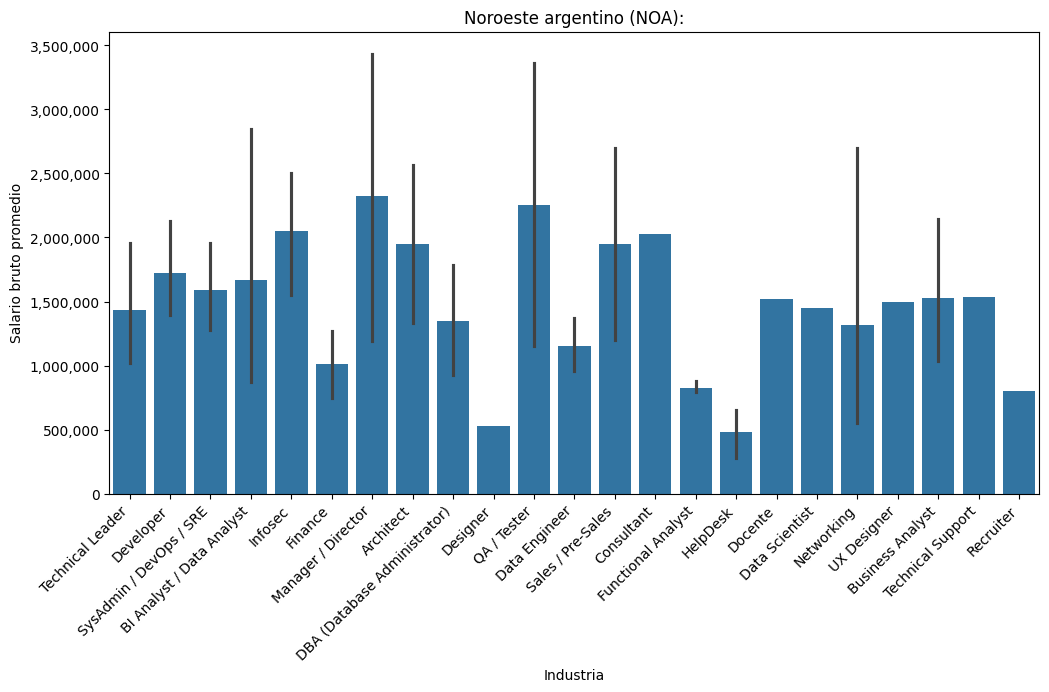

In [31]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(12, 6))

sns.barplot(x='trabajo_de', y='ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos', data=df_noa)

ax = plt.gca()

def format_tick_labels(x, pos):
    return '{:,.0f}'.format(x)

ax.yaxis.set_major_formatter(FuncFormatter(format_tick_labels))

plt.xticks(rotation=45, ha='right')
plt.title('Noroeste argentino (NOA):')
plt.xlabel('Industria')
plt.ylabel('Salario bruto promedio')

plt.show()

# Noreste argentino (NEA):

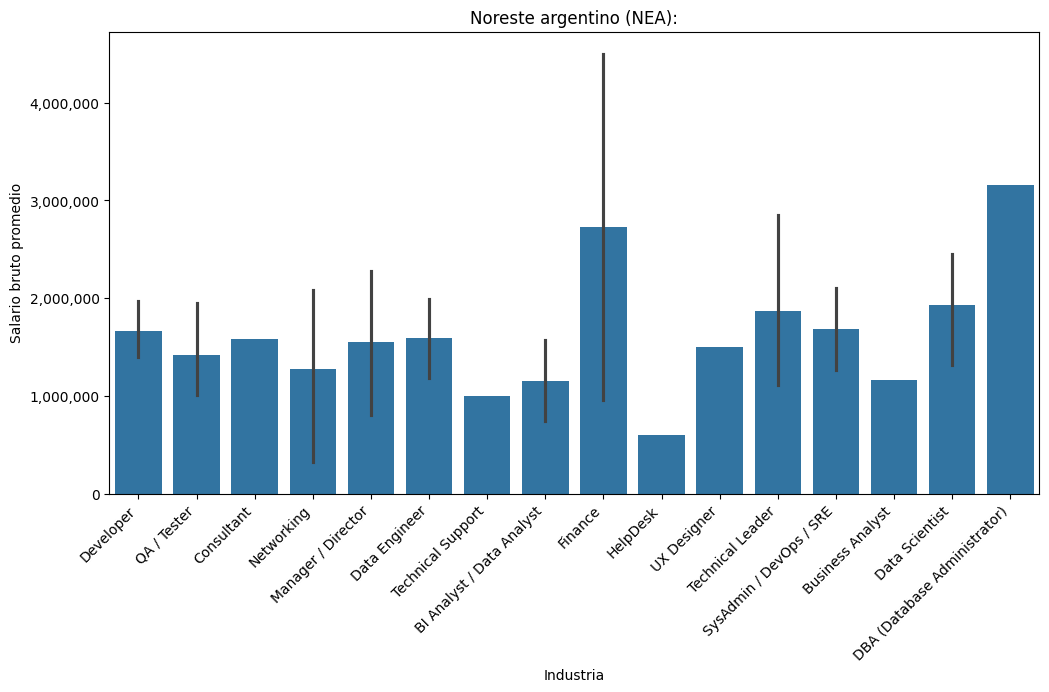

In [28]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(12, 6))

sns.barplot(x='trabajo_de', y='ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos', data=df_nea)

ax = plt.gca()

def format_tick_labels(x, pos):
    return '{:,.0f}'.format(x)

ax.yaxis.set_major_formatter(FuncFormatter(format_tick_labels))

plt.xticks(rotation=45, ha='right')
plt.title('Noreste argentino (NEA):')
plt.xlabel('Industria')
plt.ylabel('Salario bruto promedio')

plt.show()

# Centro argentino:

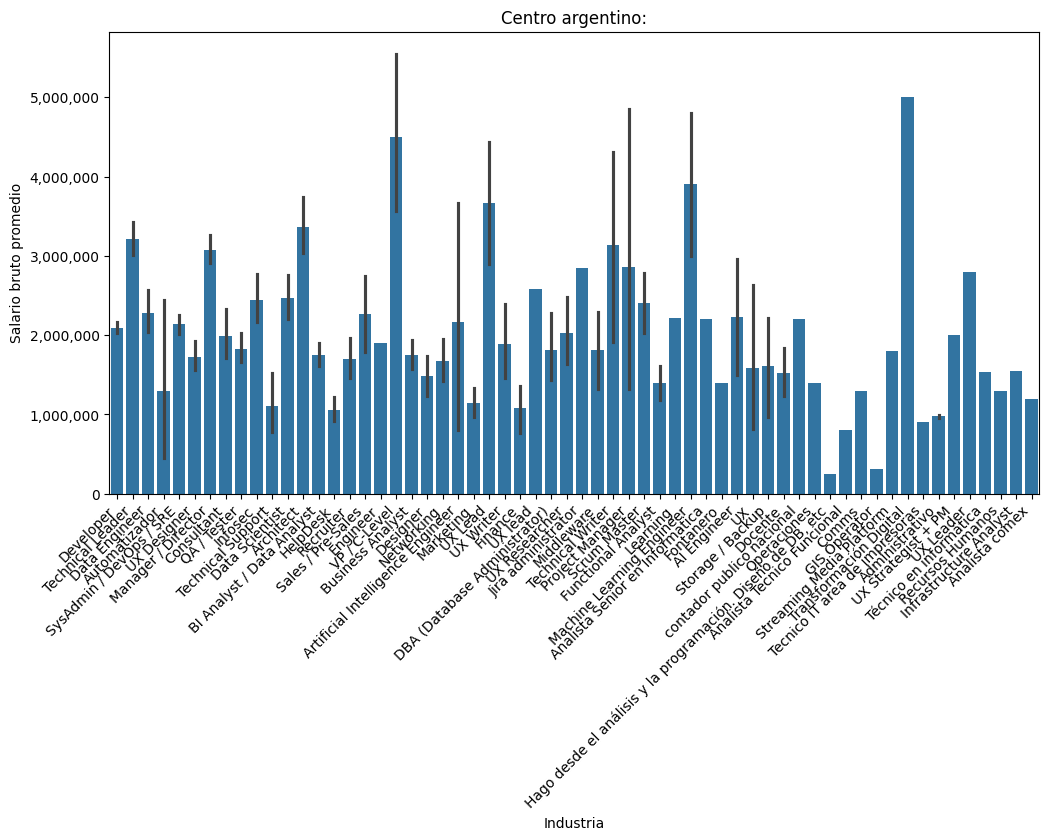

In [29]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(12, 6))

sns.barplot(x='trabajo_de', y='ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos', data=df_centro)

ax = plt.gca()

def format_tick_labels(x, pos):
    return '{:,.0f}'.format(x)

ax.yaxis.set_major_formatter(FuncFormatter(format_tick_labels))

plt.xticks(rotation=45, ha='right')
plt.title('Centro argentino:')
plt.xlabel('Industria')
plt.ylabel('Salario bruto promedio')

plt.show()

# Patagonia

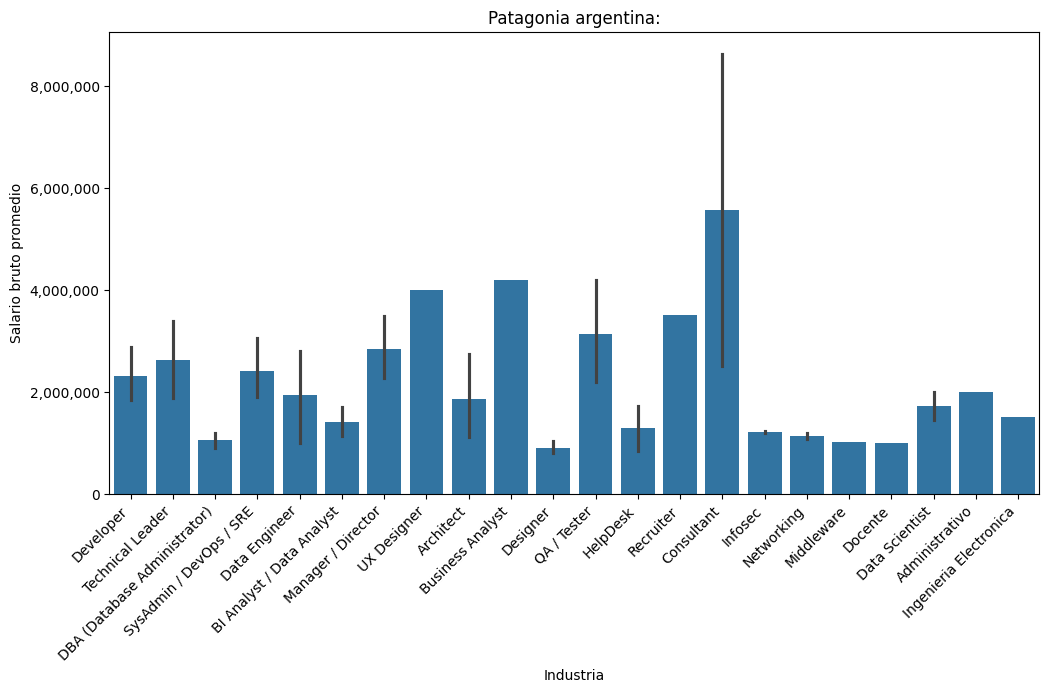

In [30]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(12, 6))

sns.barplot(x='trabajo_de', y='ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos', data=df_patagonica)

ax = plt.gca()

def format_tick_labels(x, pos):
    return '{:,.0f}'.format(x)

ax.yaxis.set_major_formatter(FuncFormatter(format_tick_labels))

plt.xticks(rotation=45, ha='right')
plt.title('Patagonia argentina:')
plt.xlabel('Industria')
plt.ylabel('Salario bruto promedio')

plt.show()